In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [24]:
X = df_train[df_train.columns[1:]]

In [25]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y = df_train['label']

In [27]:
y.shape

(60000,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [34]:
from sklearn import preprocessing
scaler1 = preprocessing.StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)

In [35]:
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5)
lr.fit(X_train_scaled, y_train)

c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
scaler2 = preprocessing.StandardScaler()
X_test_scaled = scaler2.fit_transform(X_test)

In [39]:
X_test_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
print('Accuracy: {}'.format(lr.score(X_test_scaled, y_test)))

Accuracy: 0.8985833333333333


In [41]:
X_dftest = df_test[df_test.columns[1:]]
y_dftest = df_test['label']
scaler1 = preprocessing.StandardScaler()
X_dftest_scaled = scaler1.fit_transform(X_dftest)

In [63]:
d = lr.predict(X_dftest_scaled[0:20,0:784])
print(d)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [64]:
print(y_dftest[0:20])

0     7
1     2
2     1
3     0
4     4
5     1
6     4
7     9
8     5
9     9
10    0
11    6
12    9
13    0
14    1
15    5
16    9
17    7
18    3
19    4
Name: label, dtype: int64


In [65]:
class_table = ["0","1","2","3","4","5","6","7","8","9"]

def get_label_cls(label):
 
    return class_table[label]

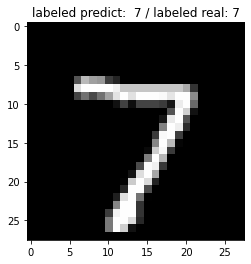

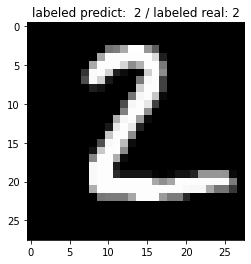

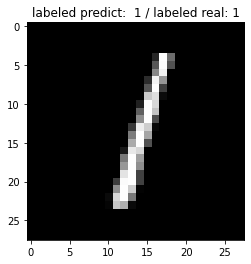

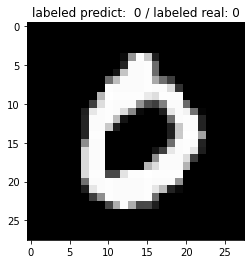

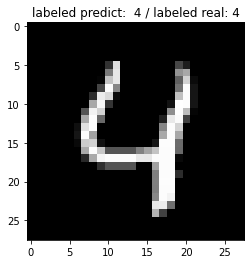

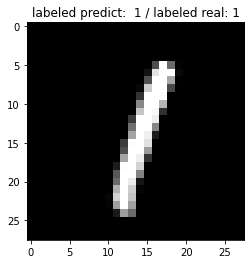

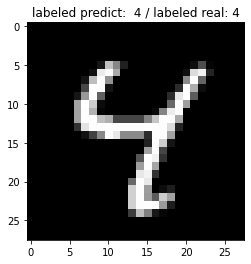

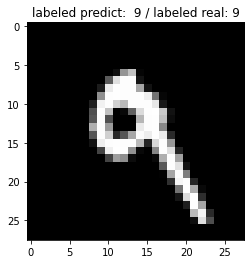

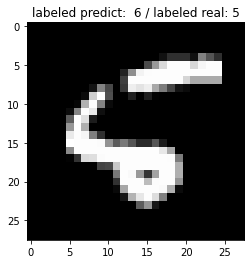

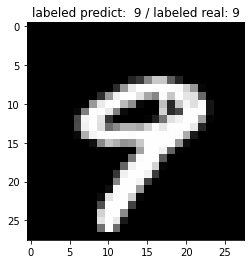

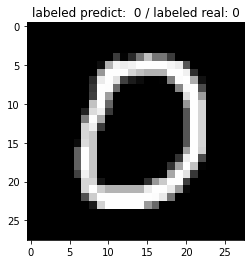

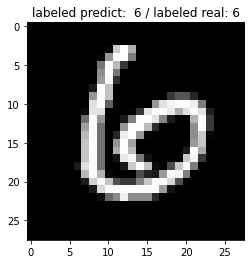

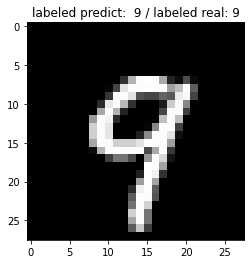

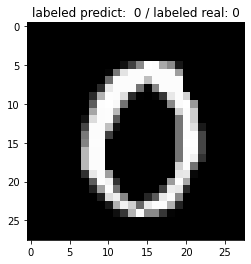

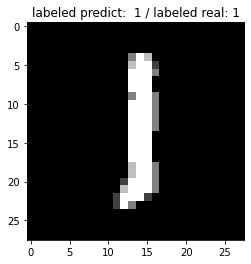

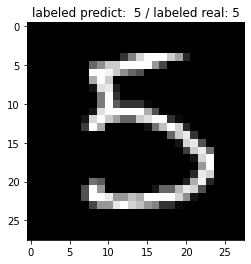

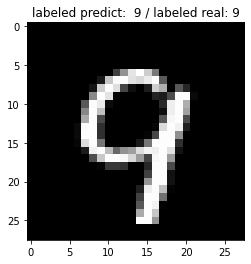

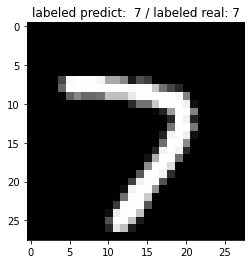

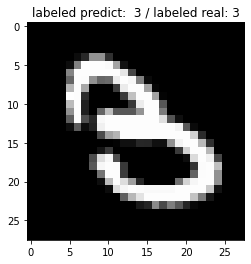

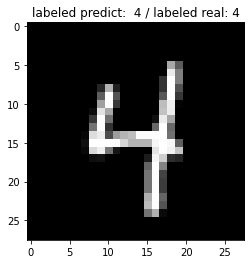

In [67]:
b = 0
for i in range(0,20): 
    sample = np.reshape(df_test[df_test.columns[1:]].iloc[i].values, (28,28))
    
    plt.figure()
    plt.title("labeled predict:  {} / labeled real: {}".format(get_label_cls(d[b]),get_label_cls(df_test["label"].iloc[i])))
    plt.imshow(sample, 'gray')
    b+=1